# Lesson 4 Homework
#### Rob Lisy


- Read data. You can keep the column names as integers for now. It's probably a lot of work digging around in the 'names' file to find all the column names. But know that the first 5 columns are not features, and the last column is the target feature.
- You'll have to deal with NaN ('?'s) values in the features.
- Apply three techniques for filter selection (just one for each): Filter methods, Wrapper methods, Embedded methods.
    - Filter methods. I would suggest mutual information. You could also look at Pearson's correlation too. Add a quick summary at the end of this.
    - Wrapper Methods: Pick either forward or backward stepwise linear regression. Report on the final chosen model. And again, use a few complete sentences. I would start with CV=5 if you are using cross validation arguments, this is a larger dataset than the lab and can tax your processor for a while.
    - Embedded Methods: Probably use Lasso Regression here. Be careful on what you pick your range of alphas to explore. Probably best to check out "numpy.logspace" instead of "numpy.linspace". Add a summary to the end.

#### Describe your findings.

So for each of the prior three methods, you should have a short summary of all three methods. NOW you'll want to create a summary of a comparison between the three prior methods. Shoot for all complete sentences and a full paragraph or two. Here's some hints on what to talk about:
Which would you pick in this situation?
Does your choice depend on anything else? like Business requirements?
Predictive policing has FAR reaching ethical implications, and is the subject of many books and resources. Please talk a bit about how important it is to correctly communicate your findings.
For more readings about the ethical implications, check out:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

file = 'http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'
df = pd.read_csv(file, header=None, na_values=['?']).fillna(0)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,0.0,0.0,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,0.0,0.0,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,0.00,0.00,0.0,0.0,0.00,0.00,0.67
2,24,0.0,0.0,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,0.00,0.00,0.0,0.0,0.00,0.00,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,0.00,0.00,0.0,0.0,0.00,0.00,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,0.00,0.00,0.0,0.0,0.00,0.00,0.03


In [2]:
df.dtypes

0        int64
1      float64
2      float64
3       object
4        int64
        ...   
123    float64
124    float64
125    float64
126    float64
127    float64
Length: 128, dtype: object

In [3]:
# Clean up the names...
col_names = ['state','county','community','communityname',
             'fold','population','householdsize','racepctblack',
             'racePctWhite','racePctAsian','racePctHisp',
             'agePct12t21','agePct12t29','agePct16t24','agePct65up',
             'numbUrban','pctUrban','medIncome','pctWWage',
             'pctWFarmSelf','pctWInvInc','pctWSocSec','pctWPubAsst',
             'pctWRetire','medFamInc','perCapInc','whitePerCap',
             'blackPerCap','indianPerCap','AsianPerCap',
             'OtherPerCap','HispPerCap','NumUnderPov','PctPopUnderPov',
             'PctLess9thGrade','PctNotHSGrad','PctBSorMore','PctUnemployed',
             'PctEmploy','PctEmplManu','PctEmplProfServ','PctOccupManu',
             'PctOccupMgmtProf','MalePctDivorce','MalePctNevMarr','FemalePctDiv',
             'TotalPctDiv','PersPerFam','PctFam2Par','PctKids2Par',
             'PctYoungKids2Par','PctTeen2Par','PctWorkMomYoungKids',
             'PctWorkMom','NumIlleg','PctIlleg','NumImmig','PctImmigRecent',
             'PctImmigRec5','PctImmigRec8','PctImmigRec10','PctRecentImmig',
             'PctRecImmig5','PctRecImmig8','PctRecImmig10','PctSpeakEnglOnly',
             'PctNotSpeakEnglWell','PctLargHouseFam','PctLargHouseOccup',
             'PersPerOccupHous','PersPerOwnOccHous','PersPerRentOccHous',
             'PctPersOwnOccup','PctPersDenseHous','PctHousLess3BR','MedNumBR',
             'HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded',
             'PctVacMore6Mos','MedYrHousBuilt','PctHousNoPhone','PctWOFullPlumb',
             'OwnOccLowQuart','OwnOccMedVal','OwnOccHiQuart','RentLowQ',
             'RentMedian','RentHighQ','MedRent','MedRentPctHousInc',
             'MedOwnCostPctInc','MedOwnCostPctIncNoMtg','NumInShelters',
             'NumStreet','PctForeignBorn','PctBornSameState','PctSameHouse85',
             'PctSameCity85','PctSameState85','LemasSwornFT','LemasSwFTPerPop',
             'LemasSwFTFieldOps','LemasSwFTFieldPerPop','LemasTotalReq',
             'LemasTotReqPerPop','PolicReqPerOffic','PolicPerPop',
             'RacialMatchCommPol','PctPolicWhite','PctPolicBlack',
             'PctPolicHisp','PctPolicAsian','PctPolicMinor','OfficAssgnDrugUnits',
             'NumKindsDrugsSeiz','PolicAveOTWorked','LandArea','PopDens',
             'PctUsePubTrans','PolicCars','PolicOperBudg','LemasPctPolicOnPatr',
             'LemasGangUnitDeploy','LemasPctOfficDrugUn','PolicBudgPerPop','ViolentCrimesPerPop']

df.columns=col_names

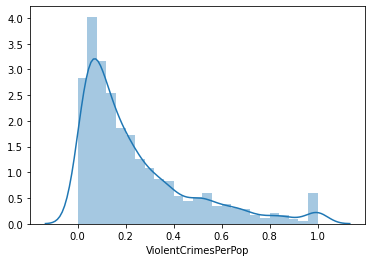

In [4]:
# Create an X and y
# X should drop the first 5 columns, and convert to a numpy array
# y should be the outcome column we care about

X = df.iloc[:, 5:127]
y = df['ViolentCrimesPerPop']
sns.distplot(df['ViolentCrimesPerPop']);

# Filter Selection

Apply 3 techniques for filter selection (1 each):
- Filter method
- Wrapper method
- Embedded method


We'll start with mutual information, which is a filter method of feature selection. Mutual information quantifies how much knowing one variable reduces the uncertainty of knowing another variable. If two features are perfectly independant, the mutual information between them is 0.

In [5]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mutual_info_score

mi_scores = []

for c in X:
    arr = X[c].values.reshape(-1,1)
    mi_scores.append(mutual_info_regression(arr, y))

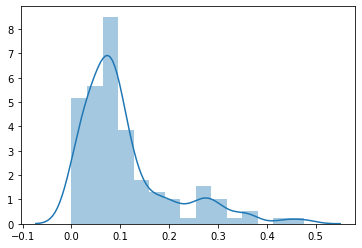

In [6]:
# look at the mutual information scores
sns.distplot(np.array(mi_scores));

# Feature selection using mutual information

We now know the distribution of Mutual Information across ALL columns as compared with our outcome/target column. We could make some decisions and potentially drop columns with "little" mutual information, based on some threshold (median mutual information maybe, or some other cutoff point... maybe quartiles / deciles).

---------------------

# Wrapper Method

We'll use backwards selection from linear regression. This method creates a (linear) model using all features, then removes features one at a time to see if the model improves.

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE #Recurisve feature elimination

In [7]:
estimator=LinearRegression()
back_selector=RFE(estimator=estimator, 
                  n_features_to_select=5, 
                  step=1)

back_selector=back_selector.fit(X, y)
mask = back_selector.support_

top_5_cols = X.iloc[:, mask]
print(top_5_cols)

      population  MalePctDivorce  TotalPctDiv  LemasSwFTPerPop  PolicPerPop
0           0.19            0.68         0.75             0.13         0.13
1           0.00            1.00         1.00             0.00         0.00
2           0.00            0.63         0.70             0.00         0.00
3           0.04            0.34         0.44             0.00         0.00
4           0.01            0.22         0.21             0.00         0.00
...          ...             ...          ...              ...          ...
1989        0.01            0.39         0.53             0.00         0.00
1990        0.05            0.42         0.48             0.00         0.00
1991        0.16            0.50         0.52             0.30         0.30
1992        0.08            0.32         0.32             0.25         0.25
1993        0.20            0.49         0.57             0.11         0.11

[1994 rows x 5 columns]


# Embedded Methods


Embedded methods put penalties on the coefficients of each attribute, and then use those to do featue selection. We'll use Lasso.

In [40]:
# First get imports and the data setup and split into test/train set...
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# let's make one Lasso model, using a small Alpha
alpha_start = .0001
clf_temp = linear_model.Lasso(alpha=alpha_start)
clf_temp.fit(x_train, y_train)

# Get coefficients + intercept
print(f"Coeffs = {clf_temp.coef_}")

In [61]:
# Try varying alpha
alpha_seq = np.linspace(0.001, .05, 50)
num_coefs = x_train.shape[1]

# Store coefficients for each alpha:
coef_cols = ['coef_' + str(ix) for ix in range(num_coefs)] + ['intercept']
alpha_df = pd.DataFrame(columns=coef_cols)

for a in alpha_seq:
    # Fit model
    clf_temp = linear_model.Lasso(alpha=a)
    clf_temp.fit(x_train, y_train)
    # Get coefficients + intercept
    coef_nums = np.append(clf_temp.coef_, clf_temp.intercept_)

    alpha_df = alpha_df.append(dict(zip(coef_cols, coef_nums)), ignore_index=True)

alpha_df.index = alpha_seq

non_intercept_cols = [c for c in alpha_df.columns if c not in ['intercept']]

# Calculate and show the most impactful attributes (i.e. those with the largest coefficients)
coef_avgs = alpha_df[non_intercept_cols].mean()
coef_avgs.sort_values().head()

coef_44   -0.075441
coef_3    -0.068907
coef_72   -0.002297
coef_48   -0.001256
coef_88   -0.000567
dtype: float64

# Coefficients

Attributes 44, 3, and 72 are (on average) the most impactful for our outcome variable. They are:
- PctKids2Par
- racePctWhite
- PctPersOwnOccup

# Summary

We have multiple options available for feature reduction. The options fall into 3 broad categories: filter, wrapper, or embedded methods. In this situation my choice as to which feature reduction method to use would really depend on the application of my hypothetical "consulting company".

In most of the scenarios I can imagine using this data for, I would consider using embedded methods. Stepwise regression in many dimensional spaces may be exhaustive to compute - every additional attribute adds an additional set of combinatorics for the model to potentially probe. There are only 6 combinations possible for 3 attributes (aka 3!), but there are over 3.6 milllion combinations for 10 attributes. Both backwards and forwards selection techniques suffer from this limitation. In addition, stepwise selection methods could leave out attributes which contain information to the model but do NOT meet the p-value.

I did (some digging)[https://perso.uclouvain.be/michel.verleysen/papers/neuralnetworks13bf.pdf] and found that mutual information has some interesting limitations. The most notable of these is that there's no connection between the use of mutual information and a regression error (i.e. chosing features based on mutual information may not actually make the best choices).

Lasso / Ridge have a very nice benefit of being quick to compute, not requiring a transform of the data, and scaling coefficients in an easy to understand method.

As far as delivering my findings, I would need to talk at length about how these features and measurements are substitutes for processes happening in the real world. For instance, Lasso seems to identify the "racePctWhite" as the 2nd most important feature - the higher the percentage of white people who live in an area the lower the rate of violent crime. However is NOT causal: being white or not doesn't CREATE crime. What we could be looking at by observing "whiteness" in the data is an underlying latent variable which we can't measure. With that in mind, I would actively discourage police departments to beef up patrols in non white neighborhoods just to prevent violent crime, since the "whiteness" may not be the inferrential silver bullet that some linear regression model thinks it is.